# Przygotowanie Danych

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

odp = 42

In [2]:
datContent = pd.read_csv("data//grafana_data_export_week.csv", delimiter=';')

In [3]:
datContent.head()

,Series,Time,Value
0,clab2189node18,2020-06-15T21:00:00+02:00,13.470261
1,clab2189node18,2020-06-15T21:20:00+02:00,14.522368
2,clab2189node18,2020-06-15T21:40:00+02:00,15.279718
3,clab2189node18,2020-06-15T22:00:00+02:00,14.351735
4,clab2189node18,2020-06-15T22:20:00+02:00,20.885126


In [4]:
datContent.Series.unique()

array(['clab2189node18', 'clab2189node19', 'clab2189node20',
       'clab2189node21'], dtype=object)

In [5]:
datContent.shape

(2020, 3)

In [6]:
datContent.count()

Series    2020
Time      2020
Value     2020
dtype: int64

In [7]:
pd.Series(datContent['Time']).is_unique

False

In [8]:
print(datContent['Series'][0], datContent['Time'][0])
print(datContent['Series'][(1 * (datContent.shape[0] // 4)) - 1], datContent['Time'][(1 * (datContent.shape[0] // 4)) - 1])
print('---')

print(datContent['Series'][(1 * (datContent.shape[0] // 4))], datContent['Time'][(1 * (datContent.shape[0] // 4))])
print(datContent['Series'][(2 * (datContent.shape[0] // 4)) - 1], datContent['Time'][(2 * (datContent.shape[0] // 4)) - 1])
print('---')

print(datContent['Series'][(2 * (datContent.shape[0] // 4))], datContent['Time'][(2 * (datContent.shape[0] // 4))])
print(datContent['Series'][(3 * (datContent.shape[0] // 4)) - 1], datContent['Time'][(3 * (datContent.shape[0] // 4)) - 1])
print('---')

print(datContent['Series'][(3 * (datContent.shape[0] // 4))], datContent['Time'][(3 * (datContent.shape[0] // 4))])
print(datContent['Series'][(4 * (datContent.shape[0] // 4)) - 1], datContent['Time'][(4 * (datContent.shape[0] // 4)) - 1])

clab2189node18 2020-06-15T21:00:00+02:00
clab2189node18 2020-06-22T21:00:00+02:00
---
clab2189node19 2020-06-15T21:00:00+02:00
clab2189node19 2020-06-22T21:00:00+02:00
---
clab2189node20 2020-06-15T21:00:00+02:00
clab2189node20 2020-06-22T21:00:00+02:00
---
clab2189node21 2020-06-15T21:00:00+02:00
clab2189node21 2020-06-22T21:00:00+02:00


In [9]:
print(datContent['Series'][0] == datContent['Series'][(1 * (datContent.shape[0] // 4)) - 1])
print(datContent['Series'][(1 * (datContent.shape[0] // 4))] == datContent['Series'][(2 * (datContent.shape[0] // 4)) - 1])
print(datContent['Series'][(2 * (datContent.shape[0] // 4))] == datContent['Series'][(3 * (datContent.shape[0] // 4)) - 1])
print(datContent['Series'][(3 * (datContent.shape[0] // 4))] == datContent['Series'][(4 * (datContent.shape[0] // 4)) - 1])

print(datContent['Time'][0] == datContent['Time'][(1 * (datContent.shape[0] // 4))] == datContent['Time'][(2 * (datContent.shape[0] // 4))] == datContent['Time'][(3 * (datContent.shape[0] // 4))])
print(datContent['Time'][(1 * (datContent.shape[0] // 4)) - 1] == datContent['Time'][(2 * (datContent.shape[0] // 4)) - 1] == datContent['Time'][(3 * (datContent.shape[0] // 4)) - 1] == datContent['Time'][(4 * (datContent.shape[0] // 4)) - 1])

True
True
True
True
True
True


In [10]:
# drop Time

d = {
    'Time': list(range((1 * (datContent.shape[0] // 4)) - 1)),
    'clab2189node18': datContent['Value'][0:(1 * (datContent.shape[0] // 4)) - 1].reset_index(drop=True),
    'clab2189node19': datContent['Value'][(1 * (datContent.shape[0] // 4)):(2 * (datContent.shape[0] // 4)) - 1].reset_index(drop=True),
    'clab2189node20': datContent['Value'][(2 * (datContent.shape[0] // 4)):(3 * (datContent.shape[0] // 4)) - 1].reset_index(drop=True),
    'clab2189node21': datContent['Value'][(3 * (datContent.shape[0] // 4)):(4 * (datContent.shape[0] // 4)) - 1].reset_index(drop=True)
}


data = pd.DataFrame(d)

In [11]:
data.head()

,Time,clab2189node18,clab2189node19,clab2189node20,clab2189node21
0,0,13.470261,12.497104,12.307692,11.789692
1,1,14.522368,13.422947,12.191719,14.515398
2,2,15.279718,13.696577,11.852457,15.019536
3,3,14.351735,12.411655,11.235736,15.275737
4,4,20.885126,17.919341,16.487906,19.697467


# Wykres!

In [12]:
def plot_data(data, num):
    x = data['Time'].values.tolist()
    if num in [18, 19, 20, 21]:
        y = data['clab2189node' + str(num)].values.tolist()
        plt.figure(figsize=(20,5))
        plt.scatter(x, y, color = 'magenta', alpha = 0.5)
        plt.plot(x, y, color = 'green')
        plt.title(f'Zużycie CPU dla node {num}')
    else:
        y1 = data['clab2189node18'].values.tolist()
        y2 = data['clab2189node19'].values.tolist()
        y3 = data['clab2189node20'].values.tolist()
        y4 = data['clab2189node21'].values.tolist()
        plt.figure(figsize=(20,5))
        plt.plot(x, y1)
        plt.plot(x, y2)
        plt.plot(x, y3)
        plt.plot(x, y4)
        plt.title(f'Zużycie CPU dla wszystkich')
    plt.xlabel('Czas')
    plt.ylabel('Zużycie CPU')
    plt.show()

In [13]:
def plot_dataXY(x, y, title):
    plt.figure(figsize=(20,5))
    plt.scatter(x, y, color = 'magenta', alpha = 0.5)
    plt.title(title)
    plt.xlabel('Czas')
    plt.ylabel('Zużycie CPU')
    plt.show()

In [14]:
def plot_dataXY2(x1, y1, x2, y2, title):
    plt.figure(figsize=(20,5))
    plt.scatter(x1, y1, color = 'green', alpha = 0.5)
    plt.scatter(x2, y2, color = 'magenta', alpha = 0.5)
    plt.title(title)
    plt.xlabel('Czas')
    plt.ylabel('Zużycie CPU')
    plt.show()

In [15]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 5 columns):
Time              504 non-null int64
clab2189node18    504 non-null float64
clab2189node19    504 non-null float64
clab2189node20    504 non-null float64
clab2189node21    504 non-null float64
dtypes: float64(4), int64(1)
memory usage: 19.8 KB


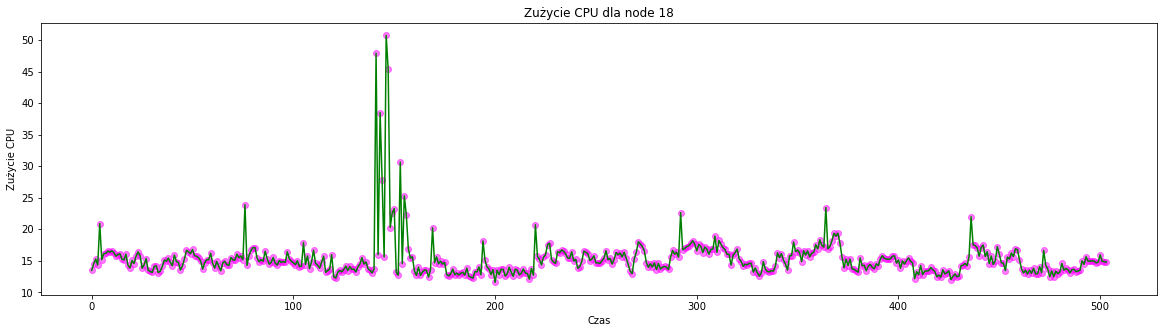

In [16]:
plot_data(data, num=18)

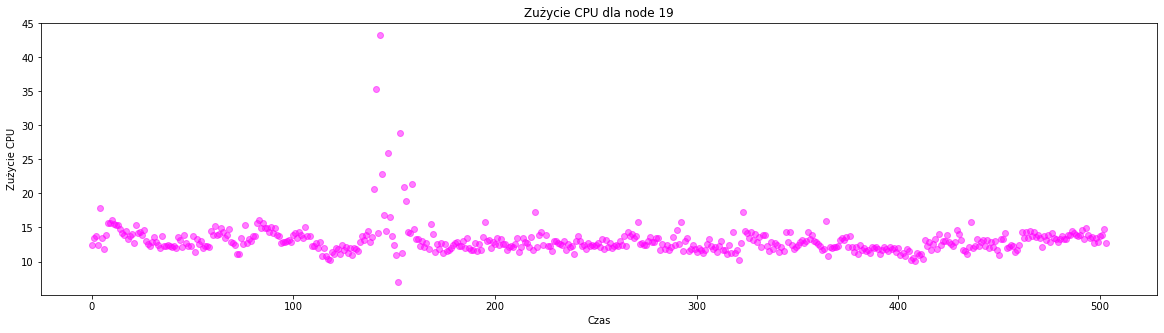

In [17]:
plot_dataXY(x=data['Time'].values.tolist(), y=data['clab2189node19'].values.tolist(), title='Zużycie CPU dla node 19')

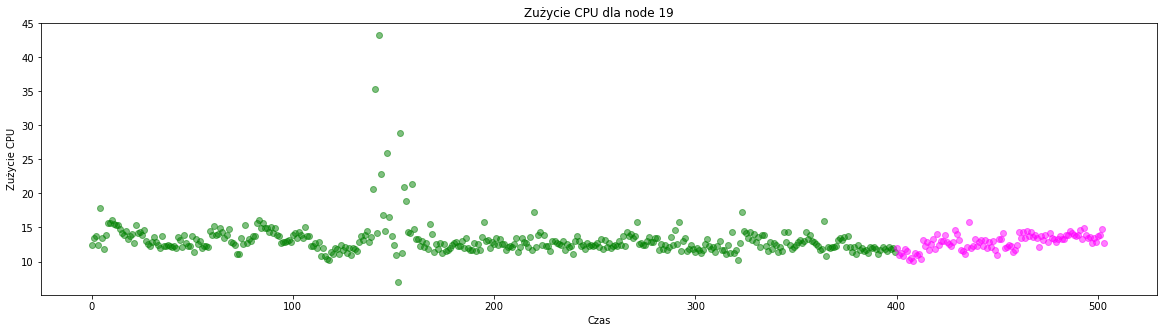

In [18]:
plot_dataXY2(x1=data['Time'].values.tolist()[:400], y1=data['clab2189node19'].values.tolist()[:400],
            x2=data['Time'].values.tolist()[400:], y2=data['clab2189node19'].values.tolist()[400:],
            title='Zużycie CPU dla node 19')

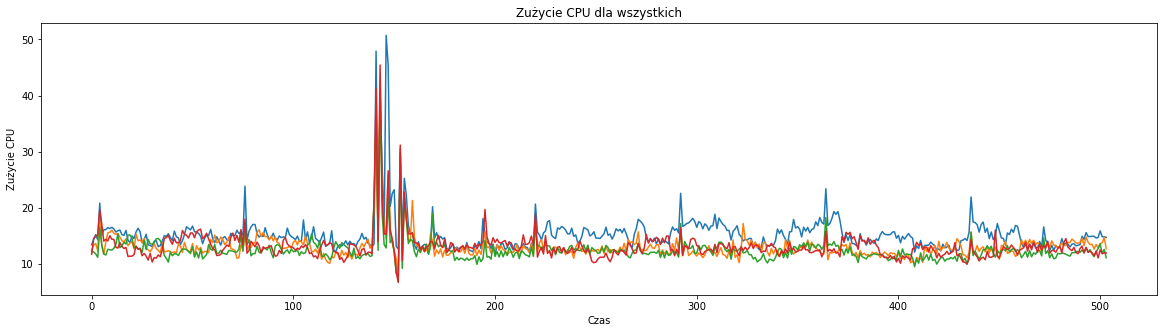

In [19]:
plot_data(data, num=False)

# Model regresji

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

def run(model, name, data):

    # dane "czasowe"
    X = data.iloc[:,0:1].values.astype(float)

    # dane wartości
    y_node18 = data.iloc[:,1:2].values.astype(float)
    y_node19 = data.iloc[:,2:3].values.astype(float)
    y_node20 = data.iloc[:,3:4].values.astype(float)
    y_node21 = data.iloc[:,4:5].values.astype(float)
    
    sc_X = StandardScaler()
    sc_y = StandardScaler()

    X = sc_X.fit_transform(X)
    y_node18 = sc_y.fit_transform(y_node18)
    y_node19 = sc_y.fit_transform(y_node19)
    y_node20 = sc_y.fit_transform(y_node20)
    y_node21 = sc_y.fit_transform(y_node21)
    
    tRMSE_18 = 0
    tRMSE_19 = 0
    tRMSE_20 = 0
    tRMSE_21 = 0

    for i in range(0, 5):
        X_train_n18, X_test_n18, y_train_n18, y_test_n18 = train_test_split(X, y_node18, test_size=0.4, random_state=odp)
        X_train_n19, X_test_n19, y_train_n19, y_test_n19 = train_test_split(X, y_node19, test_size=0.4, random_state=odp)
        X_train_n20, X_test_n20, y_train_n20, y_test_n20 = train_test_split(X, y_node20, test_size=0.4, random_state=odp)
        X_train_n21, X_test_n21, y_train_n21, y_test_n21 = train_test_split(X, y_node21, test_size=0.4, random_state=odp)

        model_18 = model
        model_18.fit(X_train_n18, y_train_n18.ravel())

        model_19 = model
        model_19.fit(X_train_n19, y_train_n19.ravel())

        model_20 = model
        model_20.fit(X_train_n20, y_train_n20.ravel())

        model_21 = model
        model_21.fit(X_train_n21, y_train_n21.ravel())
        
        y_pred_n18 = model_18.predict(X_test_n18)
        y_pred_n19 = model_19.predict(X_test_n19)
        y_pred_n20 = model_20.predict(X_test_n20)
        y_pred_n21 = model_21.predict(X_test_n21)

        mse_18 = mean_squared_error(y_test_n18, y_pred_n18)
        rmse_18 = np.sqrt(mse_18)

        mse_19 = mean_squared_error(y_test_n19, y_pred_n19)
        rmse_19 = np.sqrt(mse_19)

        mse_20 = mean_squared_error(y_test_n20, y_pred_n20)
        rmse_20 = np.sqrt(mse_20)

        mse_21 = mean_squared_error(y_test_n21, y_pred_n21)
        rmse_21 = np.sqrt(mse_21)

        tRMSE_18 += rmse_18
        tRMSE_19 += rmse_19
        tRMSE_20 += rmse_20
        tRMSE_21 += rmse_21
    
    print(f'{name}:\n')
    print(f'rmse_18: {tRMSE_18/5},\nrmse_19: {tRMSE_19/5},\nrmse_20: {tRMSE_20/5},\nrmse_21: {tRMSE_21/5},\n')
    print(f'SUM: {tRMSE_18/5 + tRMSE_19/5 + tRMSE_20/5 + tRMSE_21/5}')
    
    plot_dataXY2(x1=X_test_n18, y1=y_test_n18,
                 x2=X_test_n18, y2=y_pred_n18,
                 title='różnica między prawdą a predykcją dla node 18')
    plot_dataXY2(x1=X_test_n19, y1=y_test_n19,
                 x2=X_test_n19, y2=y_pred_n19,
                 title='różnica między prawdą a predykcją dla node 19')
    plot_dataXY2(x1=X_test_n20, y1=y_test_n20,
                 x2=X_test_n20, y2=y_pred_n20,
                 title='różnica między prawdą a predykcją dla node 20')
    plot_dataXY2(x1=X_test_n21, y1=y_test_n21,
                 x2=X_test_n21, y2=y_pred_n21,
                 title='różnica między prawdą a predykcją dla node 21')
    
    return [name, tRMSE_18/5, tRMSE_19/5, tRMSE_20/5, tRMSE_21/5, tRMSE_18/5 + tRMSE_19/5 + tRMSE_20/5 + tRMSE_21/5]
    
    

# SVR

SVR_rbf:

rmse_18: 0.9844548028926777,
rmse_19: 1.0692194001399427,
rmse_20: 1.1224778113966922,
rmse_21: 1.1174727649275433,

SUM: 4.293624779356856


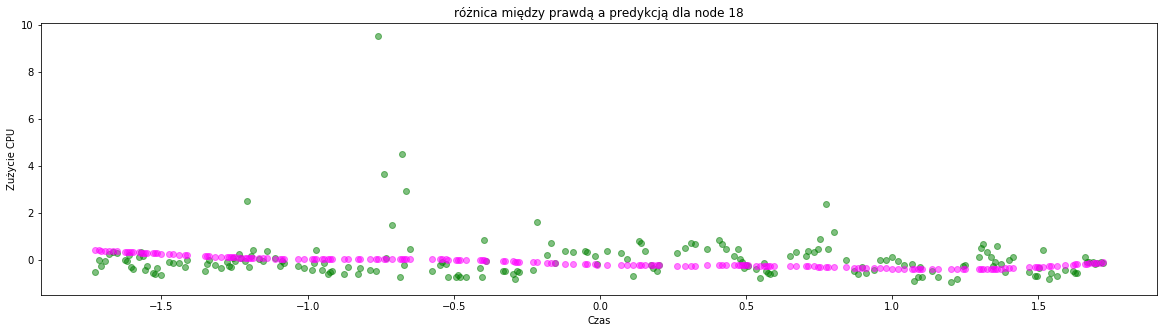

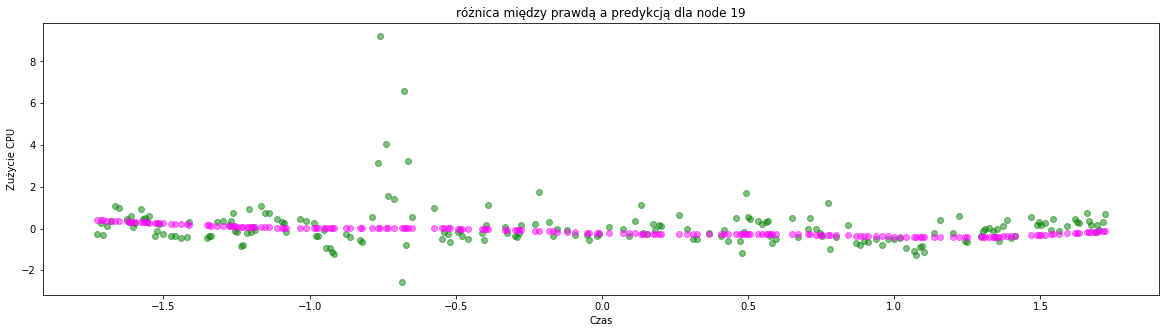

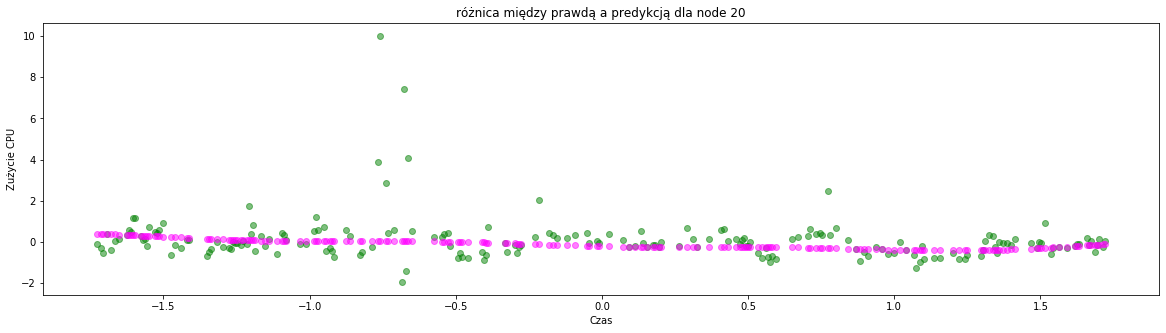

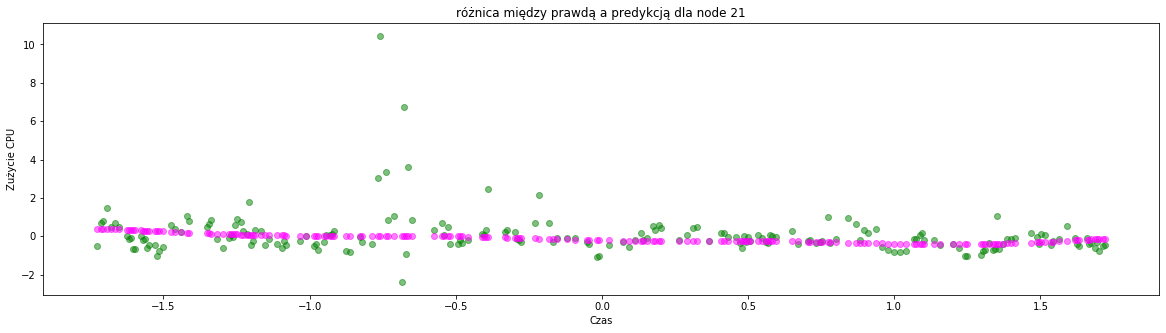

In [21]:
SVR_rbf = run(model=SVR(kernel='rbf'), data=data, name='SVR_rbf')

SVR_poly:

rmse_18: 0.9719352788410477,
rmse_19: 1.0881079045089657,
rmse_20: 1.1328134877707376,
rmse_21: 1.1237417661629894,

SUM: 4.316598437283741


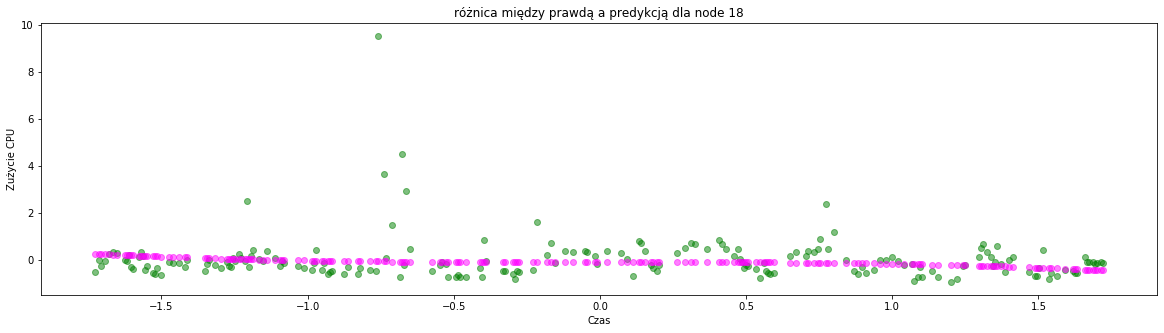

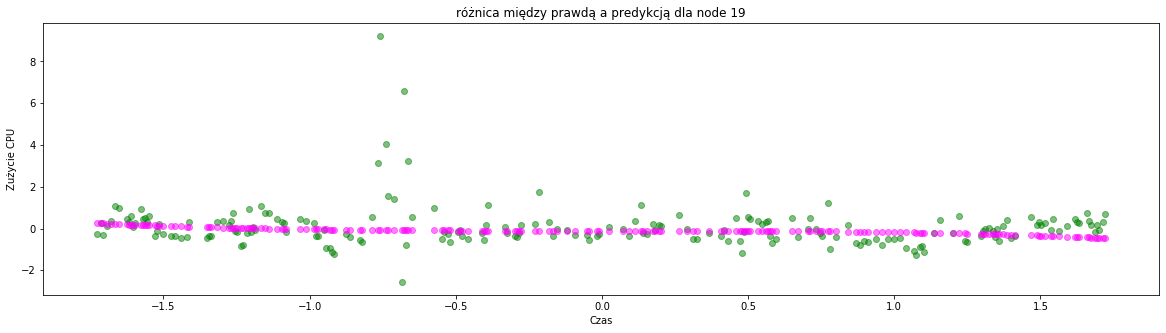

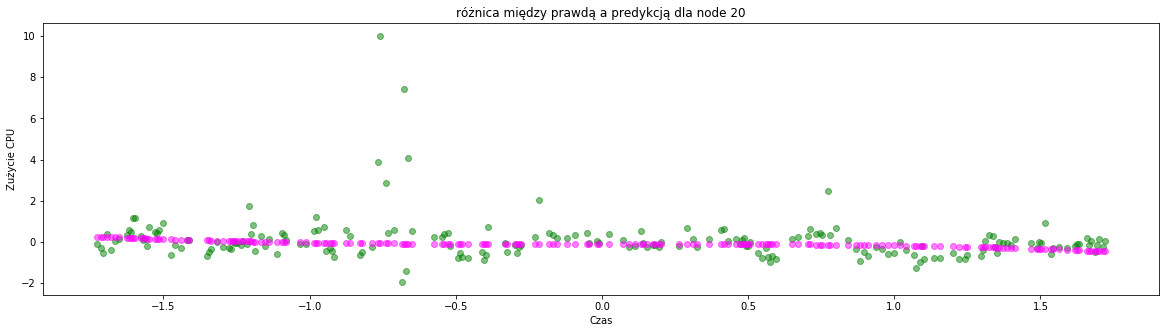

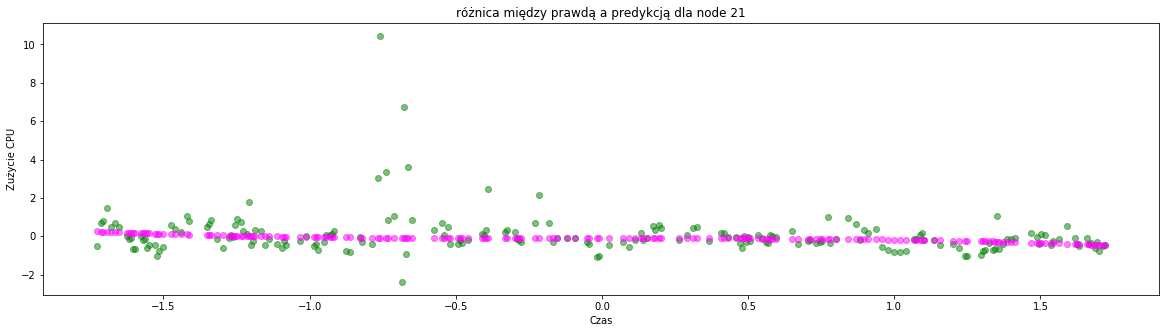

In [22]:
SVR_poly = run(model=SVR(kernel='poly'), data=data, name='SVR_poly')

LinearSVR:

rmse_18: 0.9728004310023873,
rmse_19: 1.0810492035882355,
rmse_20: 1.1260045569504444,
rmse_21: 1.1172890850536445,

SUM: 4.297143276594712


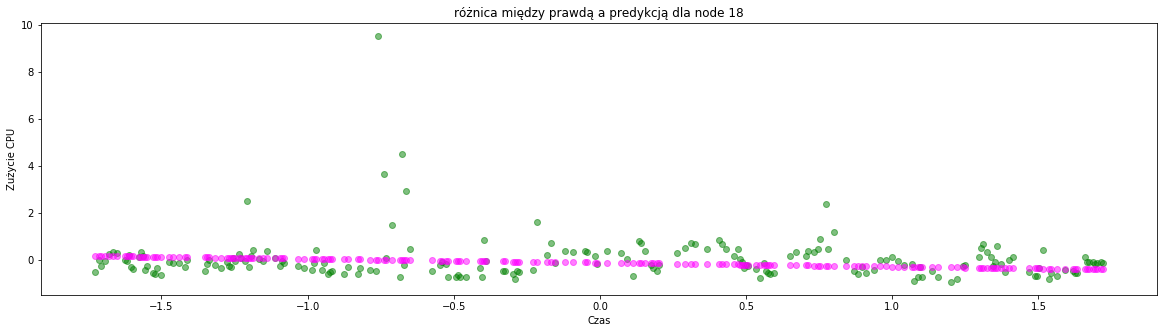

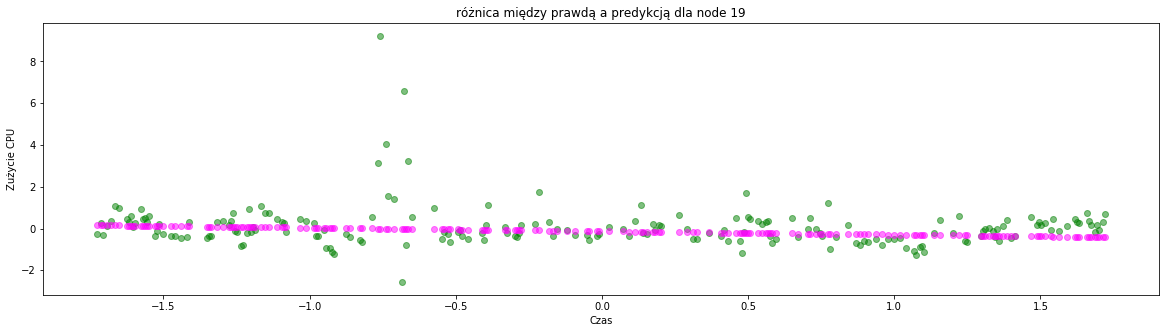

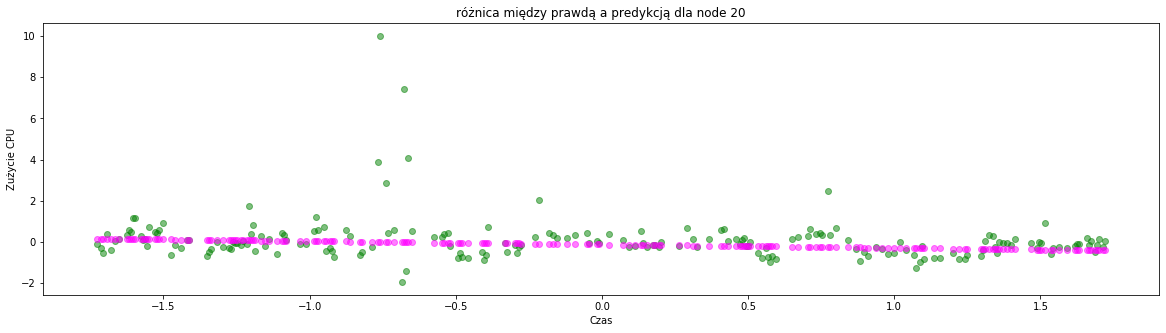

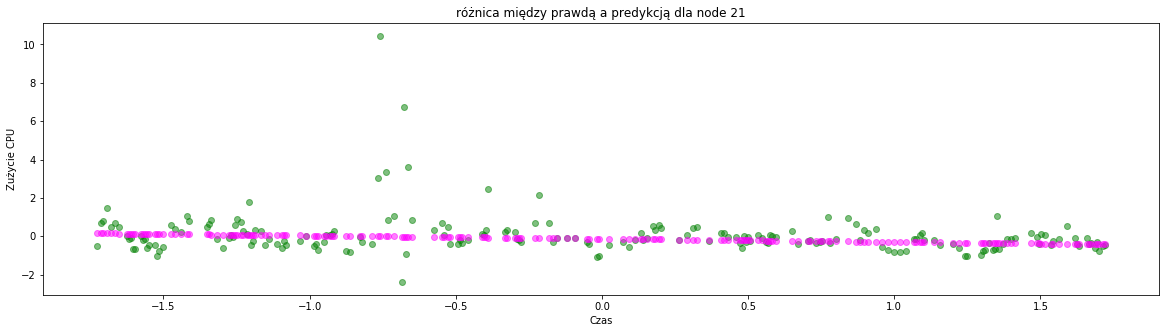

In [23]:
from sklearn.svm import LinearSVR

LinearSVR = run(model=LinearSVR(), data=data, name='LinearSVR')

NuSVR:

rmse_18: 0.9723614861237403,
rmse_19: 1.0708972885190728,
rmse_20: 1.12143111535152,
rmse_21: 1.1164622122970267,

SUM: 4.28115210229136


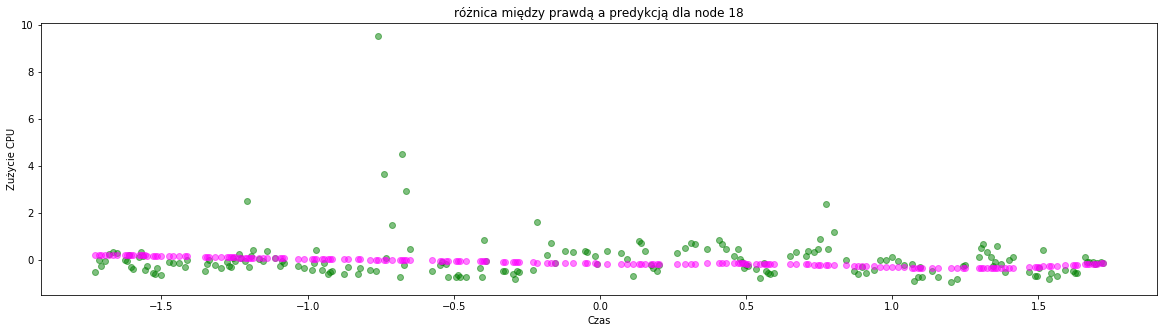

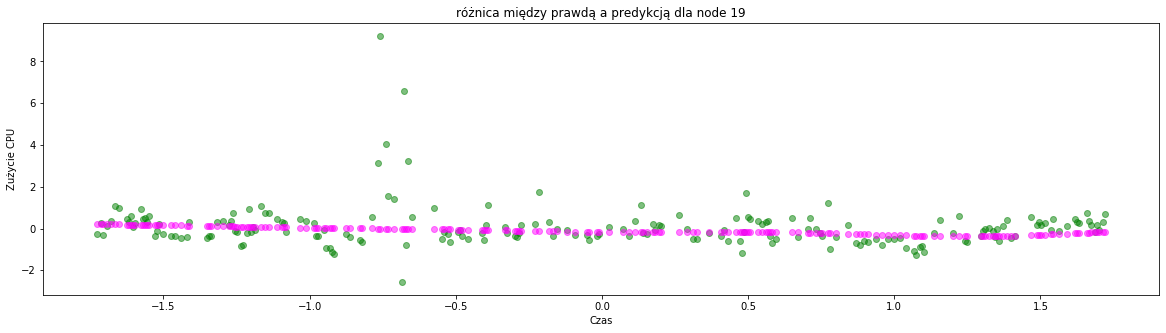

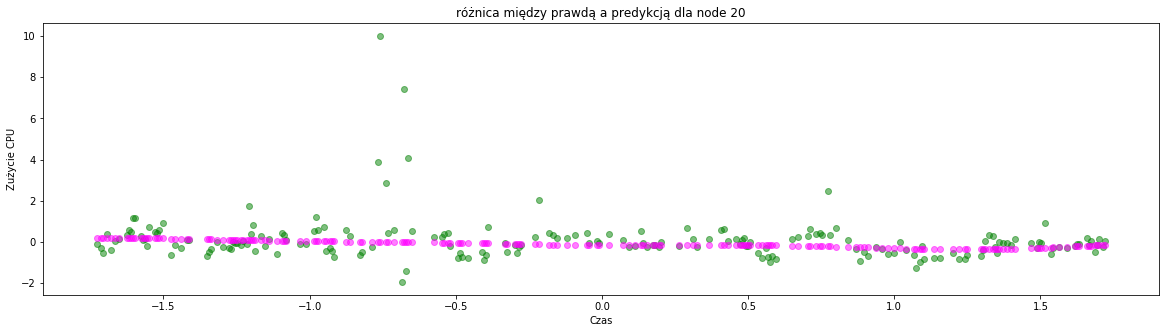

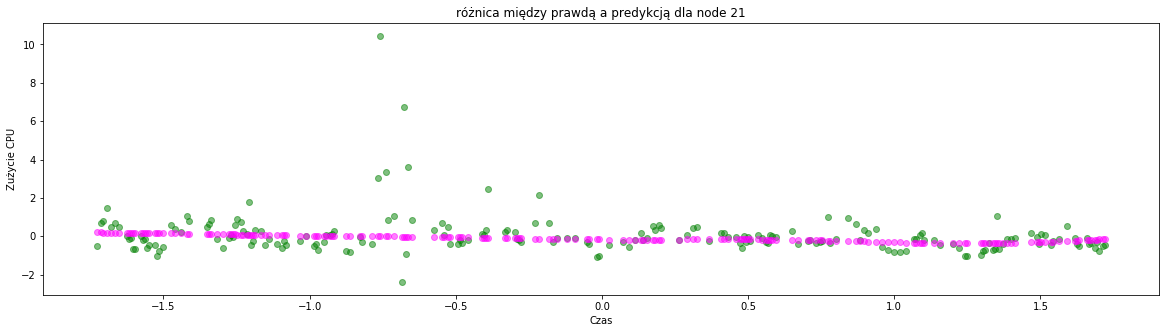

In [24]:
from sklearn.svm import NuSVR

NuSVR = run(model=NuSVR(), data=data, name='NuSVR')

DecisionTree_Regressor(42):

rmse_18: 1.273827678213021,
rmse_19: 1.3496143417400104,
rmse_20: 1.4848315140291015,
rmse_21: 1.2873381459008986,

SUM: 5.395611679883031


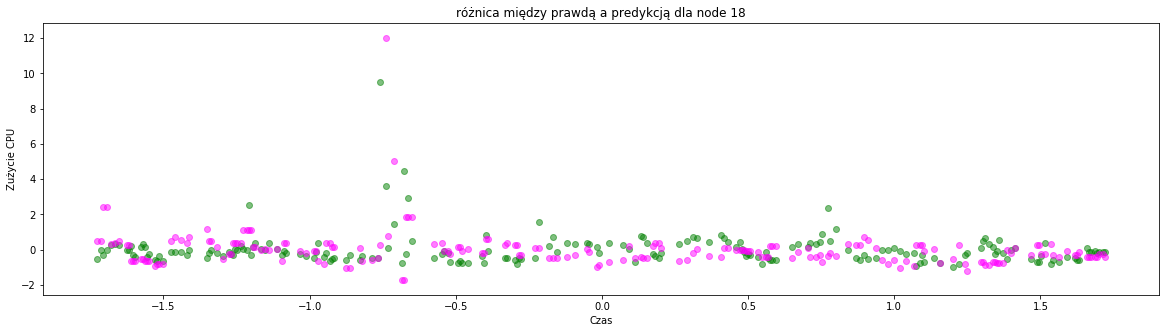

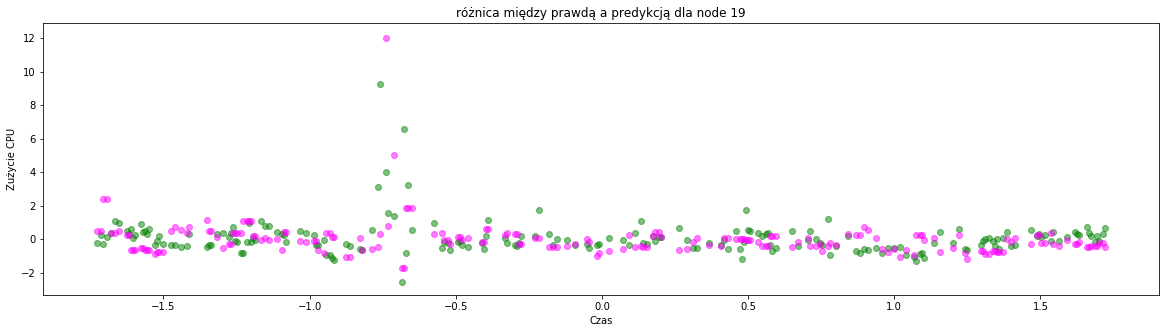

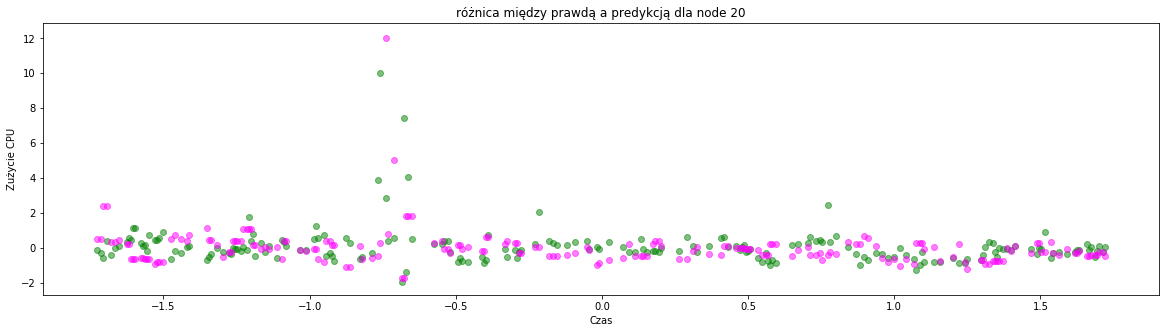

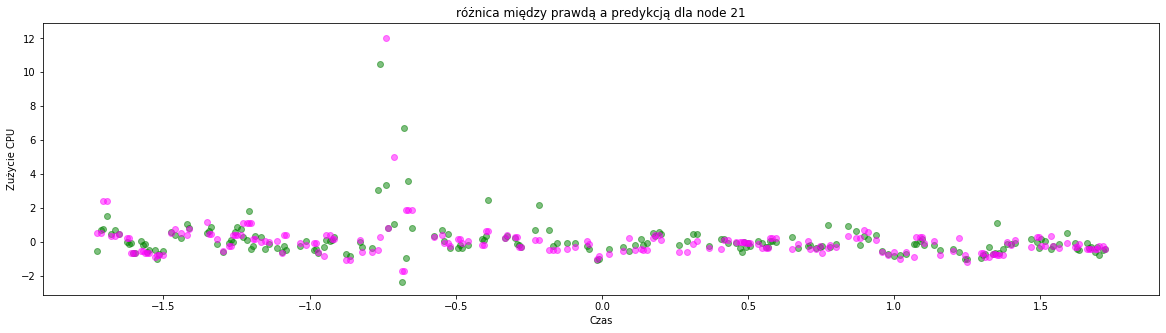

In [25]:
from sklearn.tree import DecisionTreeRegressor

DecisionTree_Regressor = run(model=DecisionTreeRegressor(random_state=odp), data=data, name='DecisionTree_Regressor(42)')

# Modele liniowe

Linear_Regression:

rmse_18: 0.9690456305771921,
rmse_19: 1.0684764103130058,
rmse_20: 1.1124294513214348,
rmse_21: 1.10481514640221,

SUM: 4.254766638613843


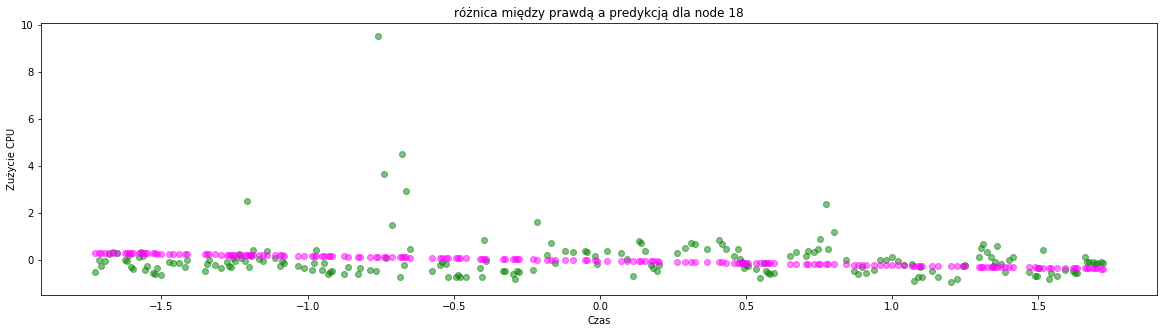

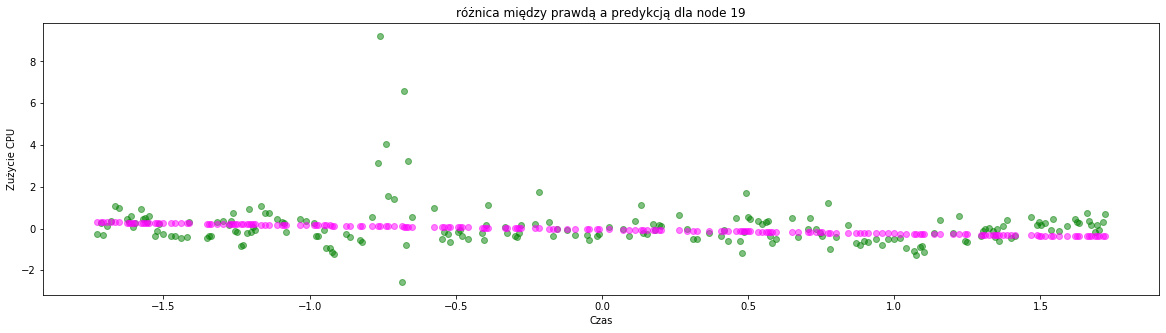

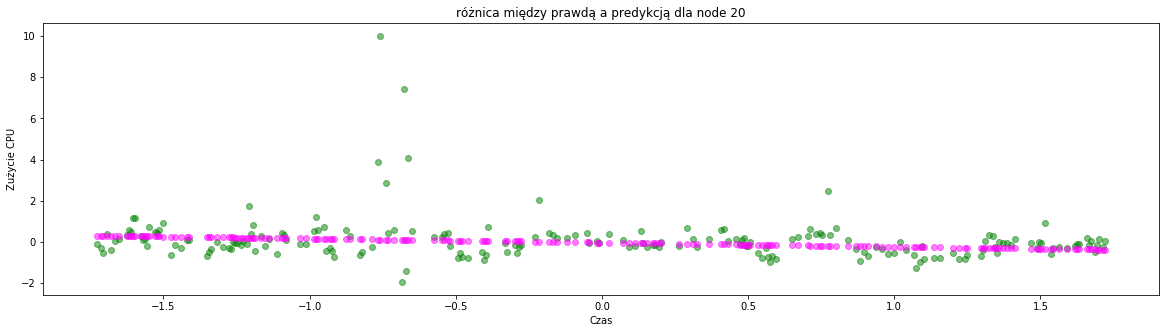

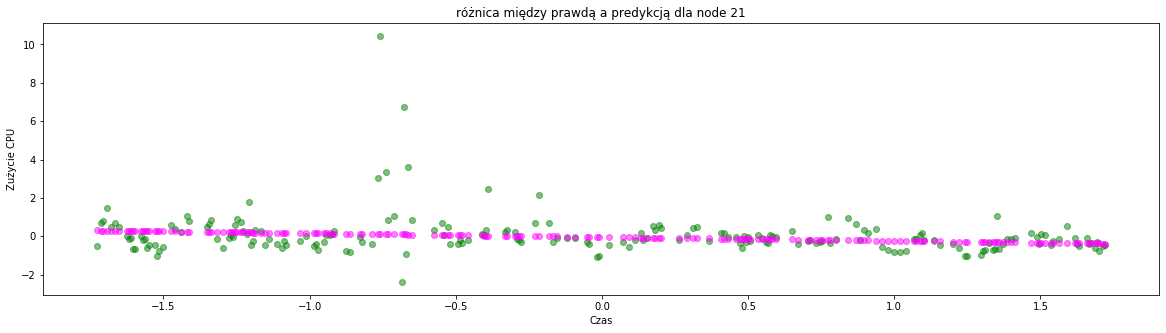

In [26]:
from sklearn.linear_model import LinearRegression

Linear_Regression = run(model=LinearRegression(), data=data, name='Linear_Regression')

Huber_Regression:

rmse_18: 0.969784658903858,
rmse_19: 1.0774135844052564,
rmse_20: 1.1229085549711024,
rmse_21: 1.1145631559237994,

SUM: 4.284669954204016


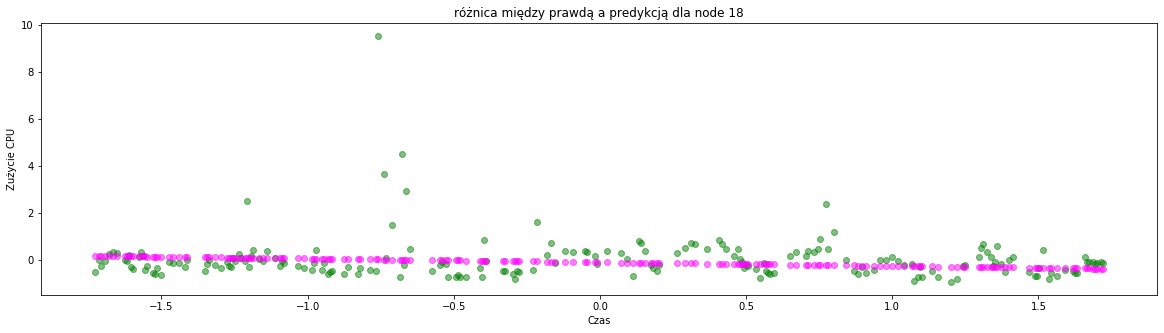

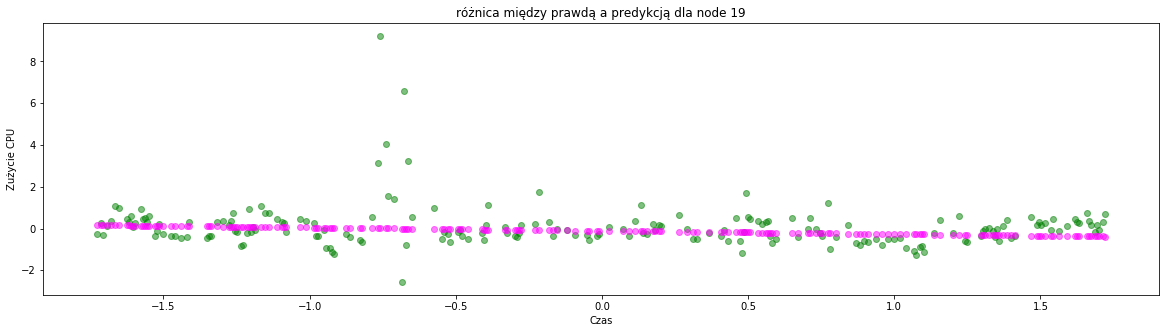

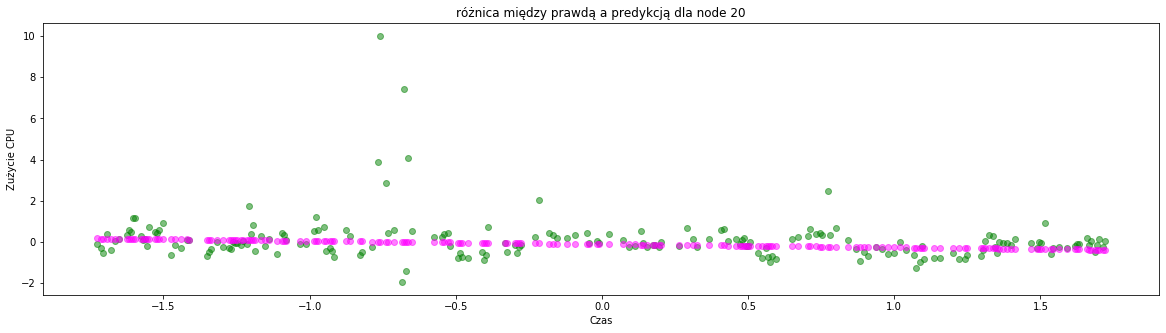

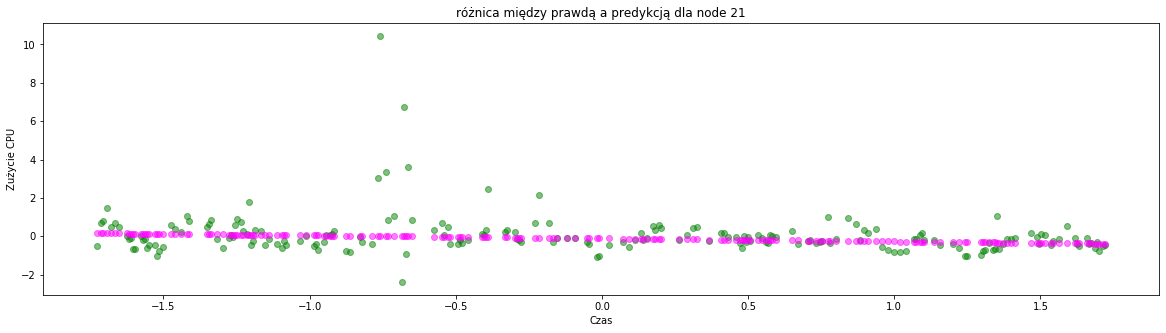

In [27]:
from sklearn.linear_model import HuberRegressor

Huber_Regression = run(model=HuberRegressor(), data=data, name='Huber_Regression')

Theil_Sen_Regressor:

rmse_18: 0.9726668328498974,
rmse_19: 1.0815728466509533,
rmse_20: 1.1268020067730569,
rmse_21: 1.1181036982155121,

SUM: 4.299145384489419


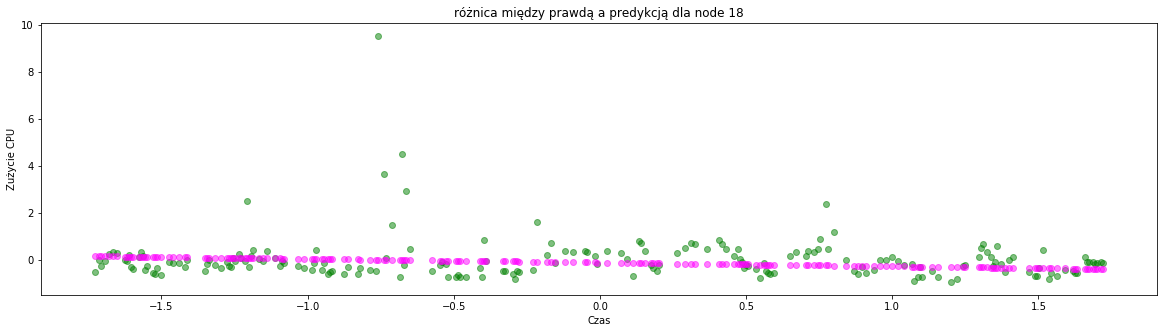

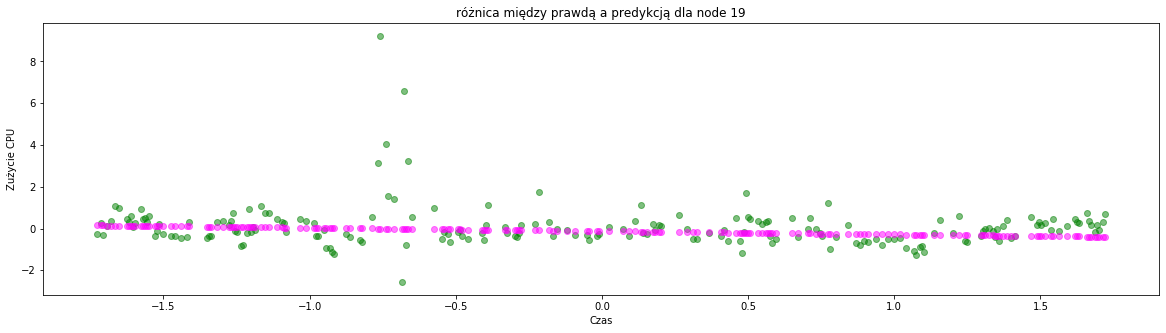

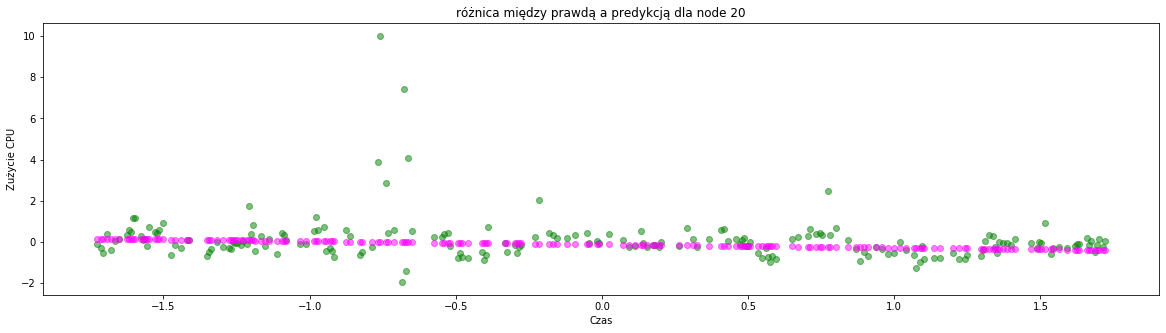

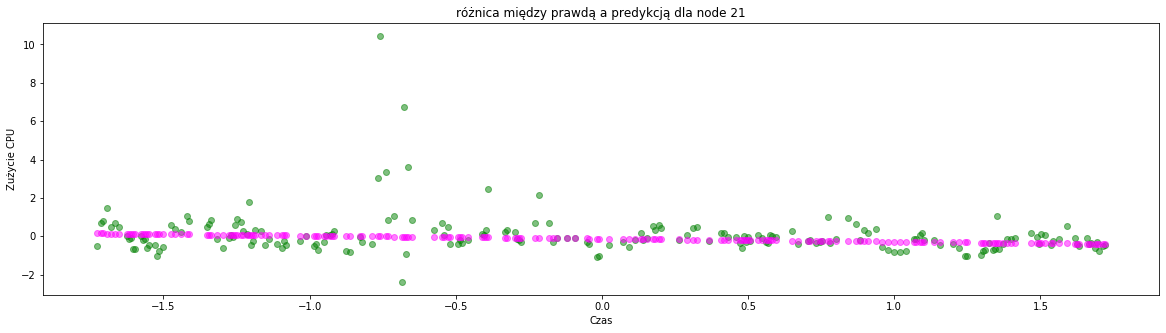

In [28]:
from sklearn.linear_model import TheilSenRegressor

Theil_Sen_Regressor = run(model=TheilSenRegressor(), data=data, name='Theil_Sen_Regressor')

# N sąsiadów

KNeighbors_Regressor(5):

rmse_18: 0.9392480139553012,
rmse_19: 0.9774002507794066,
rmse_20: 1.0827583684011286,
rmse_21: 0.93718603489329,

SUM: 3.9365926680291268


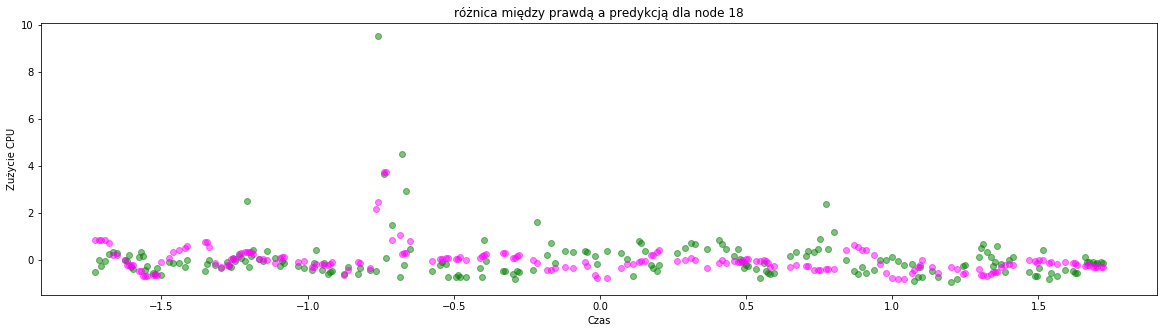

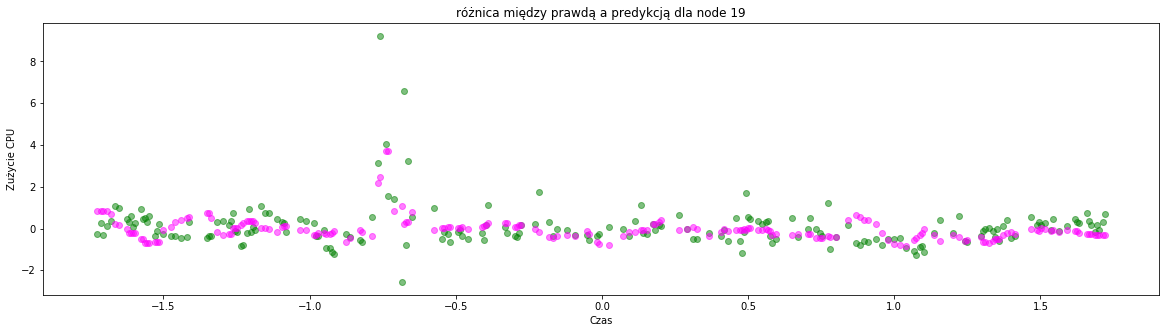

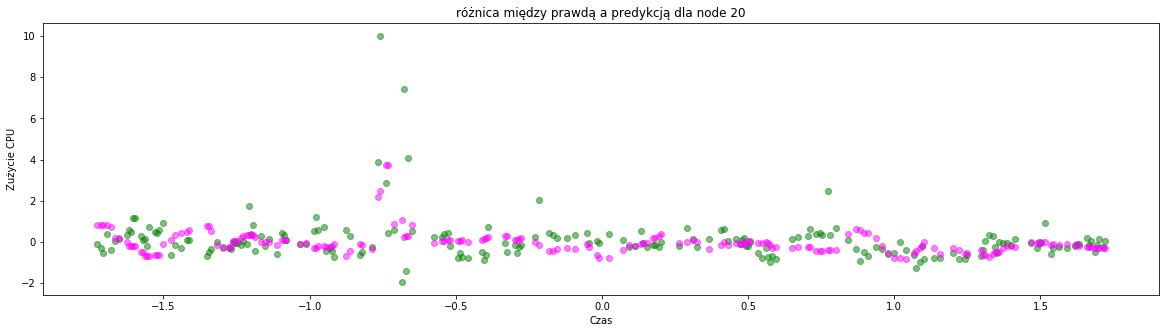

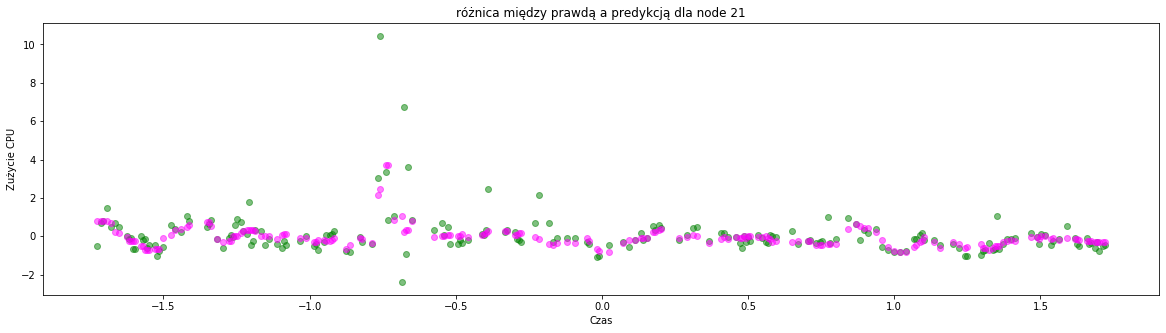

In [29]:
from sklearn.neighbors import KNeighborsRegressor

KNeighbors_Regressor_5 = run(model=KNeighborsRegressor(), data=data, name='KNeighbors_Regressor(5)')

KNeighbors_Regressor(2):

rmse_18: 0.9588767379103726,
rmse_19: 1.0104183024877436,
rmse_20: 1.1504020761556024,
rmse_21: 0.90806132569425,

SUM: 4.027758442247968


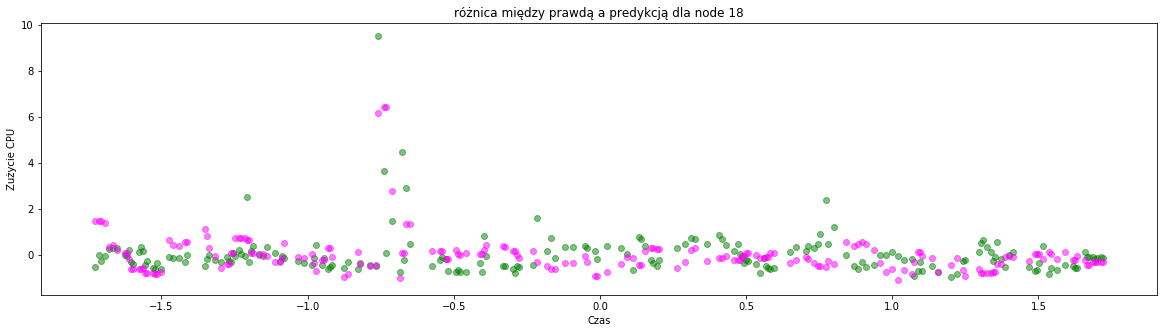

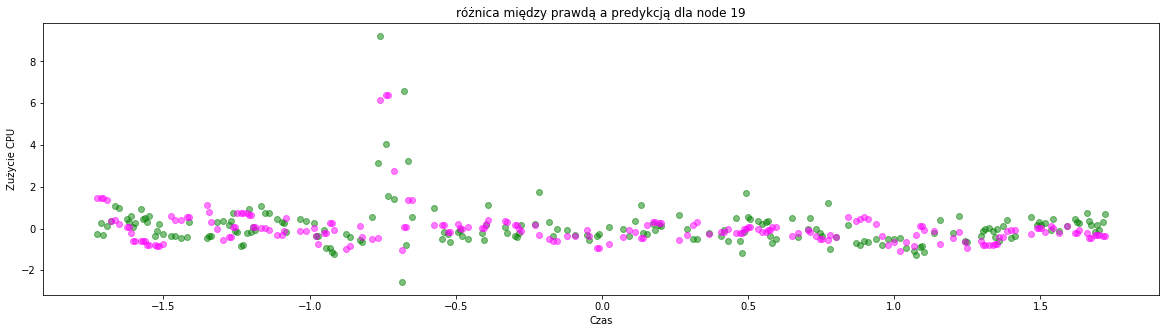

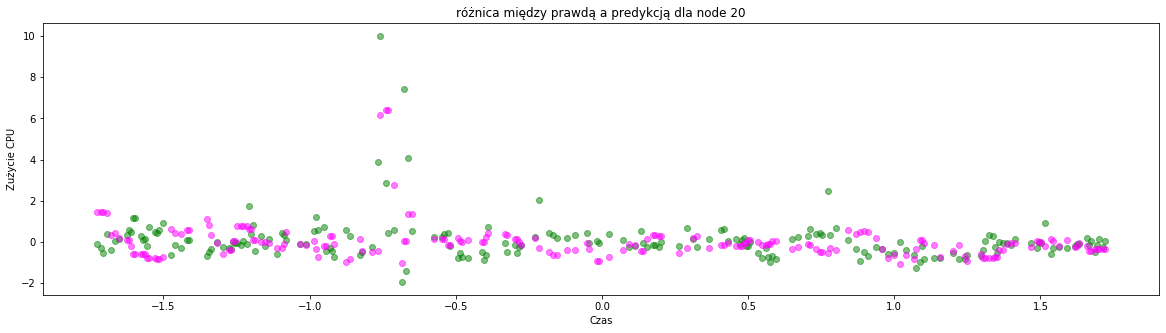

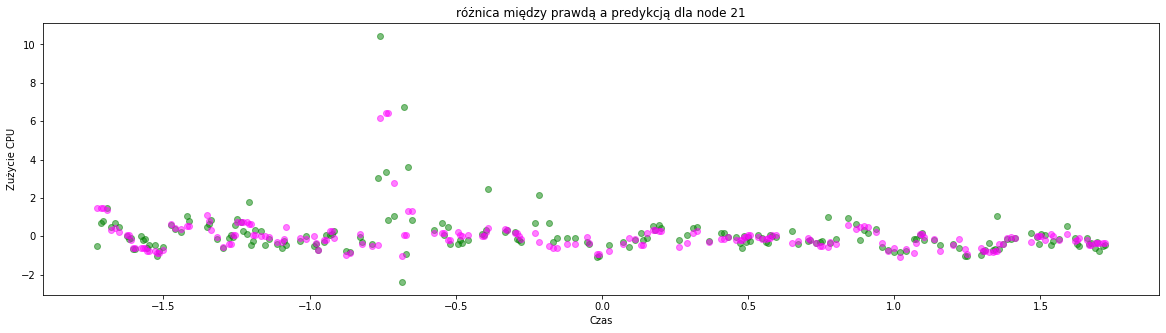

In [30]:
from sklearn.neighbors import KNeighborsRegressor

KNeighbors_Regressor_2 = run(model=KNeighborsRegressor(n_neighbors=2), data=data, name='KNeighbors_Regressor(2)')

RadiusNeighbors_Regressor(0.1):

rmse_18: 0.9187850126042033,
rmse_19: 0.9831678174541378,
rmse_20: 1.067734369095978,
rmse_21: 0.9984858424082429,

SUM: 3.968173041562562


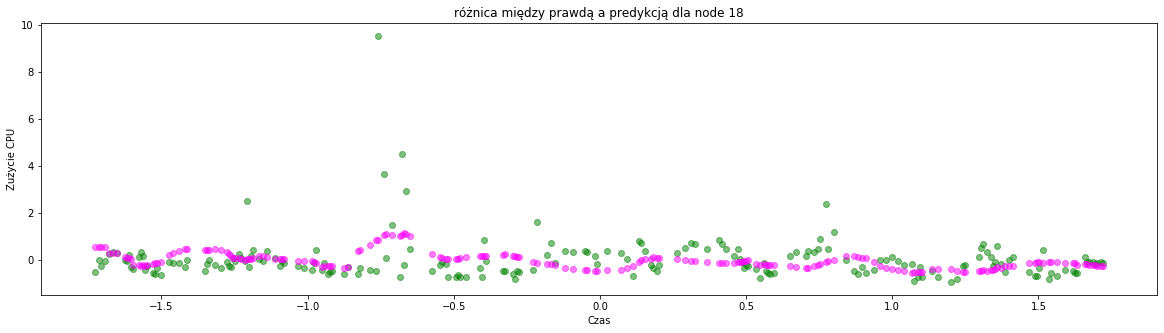

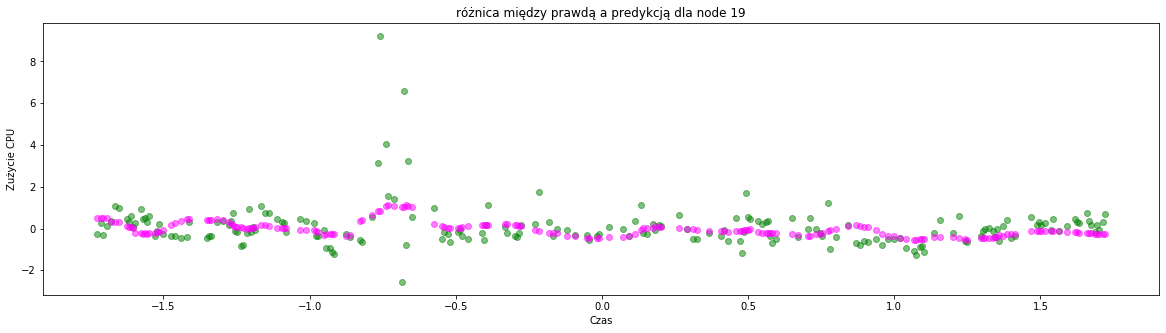

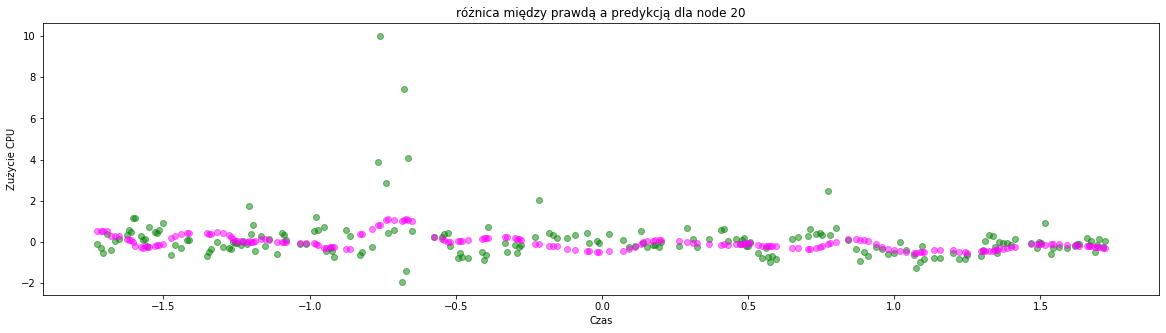

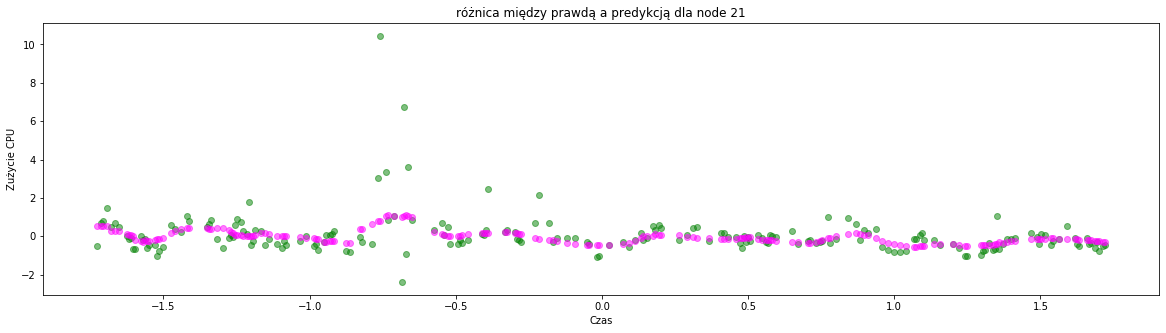

In [31]:
from sklearn.neighbors import RadiusNeighborsRegressor

RadiusNeighbors_Regressor = run(model=RadiusNeighborsRegressor(radius=0.1), data=data, name='RadiusNeighbors_Regressor(0.1)')

# Wyniki

In [32]:
output = [
    SVR_rbf,
    SVR_poly,
    LinearSVR,
    NuSVR,
    DecisionTree_Regressor,
    Linear_Regression,
    Huber_Regression,
    Theil_Sen_Regressor,
    KNeighbors_Regressor_5,
    KNeighbors_Regressor_2,
    RadiusNeighbors_Regressor
]

In [33]:
from tabulate import tabulate

print(tabulate(output, headers=['Name', 'n18', 'n19', 'n20', 'n21', 'SUM']))

Name                                 n18       n19      n20       n21      SUM
------------------------------  --------  --------  -------  --------  -------
SVR_rbf                         0.984455  1.06922   1.12248  1.11747   4.29362
SVR_poly                        0.971935  1.08811   1.13281  1.12374   4.3166
LinearSVR                       0.9728    1.08105   1.126    1.11729   4.29714
NuSVR                           0.972361  1.0709    1.12143  1.11646   4.28115
DecisionTree_Regressor(42)      1.27383   1.34961   1.48483  1.28734   5.39561
Linear_Regression               0.969046  1.06848   1.11243  1.10482   4.25477
Huber_Regression                0.969785  1.07741   1.12291  1.11456   4.28467
Theil_Sen_Regressor             0.972667  1.08157   1.1268   1.1181    4.29915
KNeighbors_Regressor(5)         0.939248  0.9774    1.08276  0.937186  3.93659
KNeighbors_Regressor(2)         0.958877  1.01042   1.1504   0.908061  4.02776
RadiusNeighbors_Regressor(0.1)  0.918785  0.983168  1